In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
import seaborn as sns


# Preparando o dataset 

In [2]:
dataset = load_iris()
dir(dataset)
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
#Colocando as informaçõs do dataset para o DataFrame para manipular melhor os dados.
#Colunas passadas: variáveis (sepal, petal), target (classificação [0-2]) e o tipo de flor.
df = pd.DataFrame(dataset.data, columns = dataset['feature_names'])
df['target'] = dataset['target']
df['target_names'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Análise gráfica

<function matplotlib.pyplot.show(*args, **kw)>

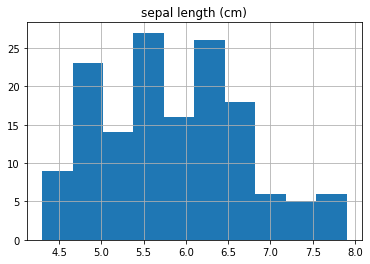

In [19]:
#Faz um histograma para determinada variável.
coluna = 'sepal length (cm)'
df[coluna].hist()
plt.title(coluna)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

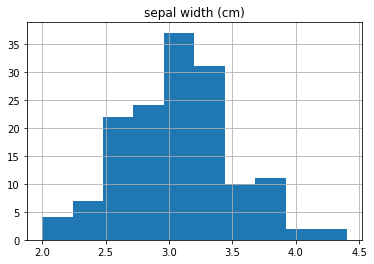

In [20]:
coluna = 'sepal width (cm)'
df[coluna].hist()
plt.title(coluna)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

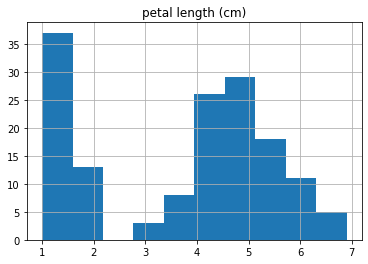

In [21]:
coluna = 'petal length (cm)'
df[coluna].hist()
plt.title(coluna)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

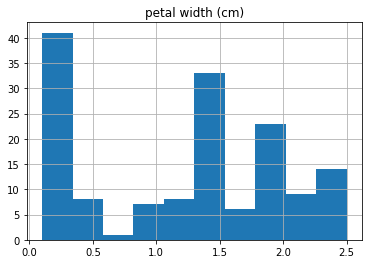

In [22]:
coluna = 'petal width (cm)'
df[coluna].hist()
plt.title(coluna)
plt.show

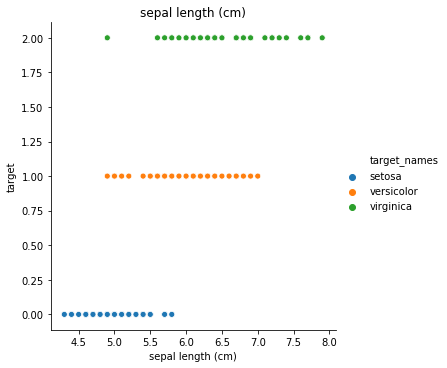

In [23]:
#Mostra a relação entre x e y
sns.relplot(x = 'sepal length (cm)', y = 'target', hue = 'target_names', data = df)
_ = plt.title('sepal length (cm)')  #colocando a variável _ não irá retornar informações sobre o objeto.

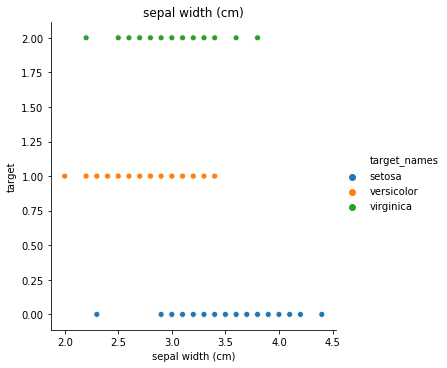

In [24]:
sns.relplot(x = 'sepal width (cm)', y = 'target', hue = 'target_names', data = df)
_ = plt.title('sepal width (cm)')

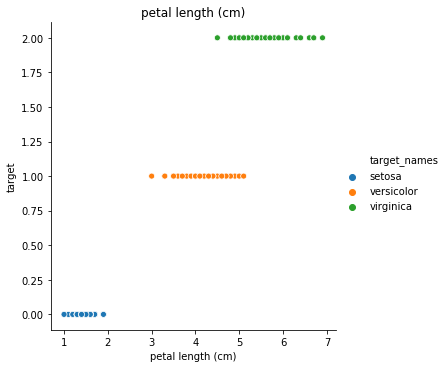

In [25]:
sns.relplot(x = 'petal length (cm)', y = 'target', hue = 'target_names', data = df)
_ = plt.title('petal length (cm)')

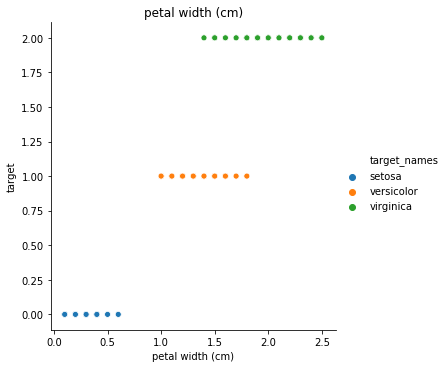

In [26]:
sns.relplot(x = 'petal width (cm)', y = 'target', hue = 'target_names', data = df)
_ = plt.title('petal width (cm)')

# EXPLORATORY DATA ANALYSIS (EDA)

C:\Users\PICHAU\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\PICHAU\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


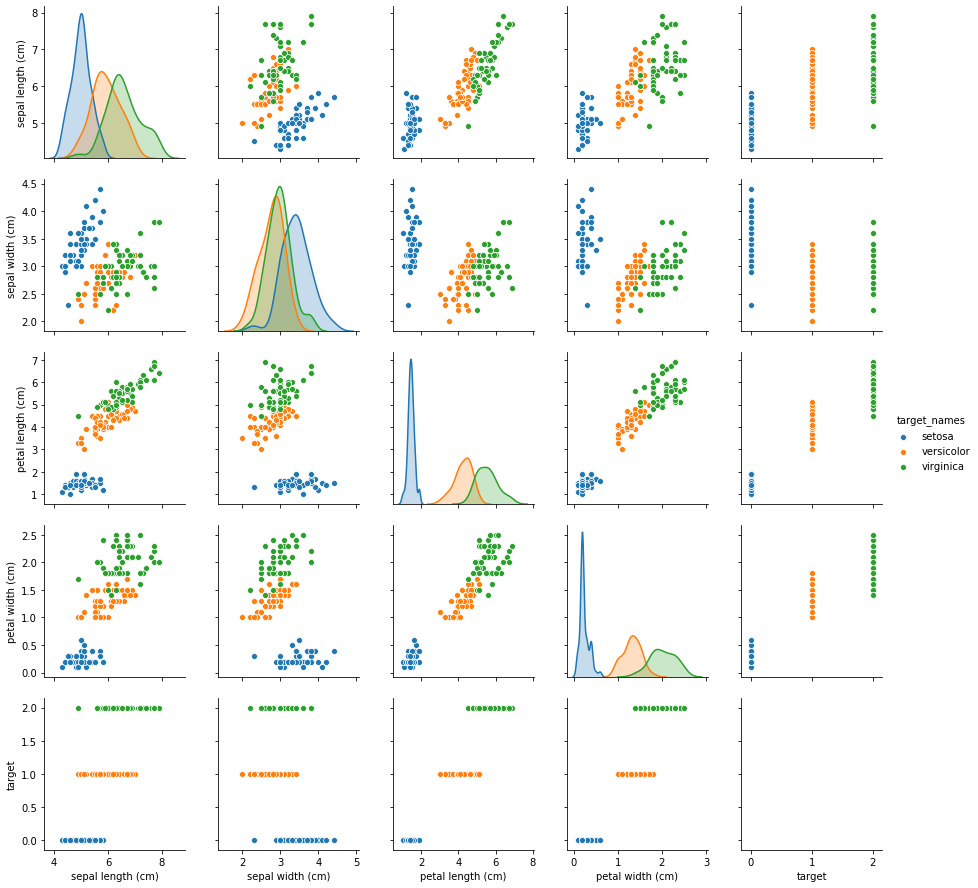

In [27]:

sns.pairplot(df, hue = 'target_names')

# Treinando o modelo e prevendo os valores

In [5]:
X = df.iloc[:, 0:4].values
y = df['target'].values


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [7]:
modelo = LogisticRegression().fit(X_train, y_train)


In [8]:
modelo.score(X_test, y_test)

0.9666666666666667

In [9]:
previsao = modelo.predict(X_test)
previsao


array([2, 0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 0, 2, 1,
       0, 0, 1, 2, 2, 1, 2, 0])

Text(69.0, 0.5, 'Realidade')

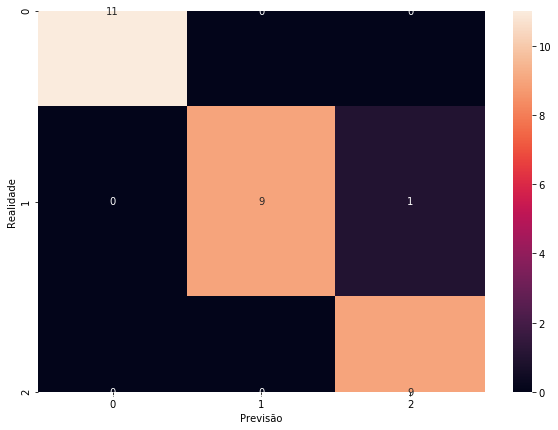

In [10]:
cm = confusion_matrix(y_test, previsao)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Previsão')
plt.ylabel('Realidade')

In [11]:
X_test

array([[7.7, 2.8, 6.7, 2. ],
       [4.9, 3. , 1.4, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [6.3, 2.5, 5. , 1.9],
       [5.5, 2.6, 4.4, 1.2],
       [5.1, 3.8, 1.9, 0.4],
       [5.7, 4.4, 1.5, 0.4],
       [4.4, 3. , 1.3, 0.2],
       [5.6, 3. , 4.5, 1.5],
       [6.9, 3.2, 5.7, 2.3],
       [4.8, 3.4, 1.6, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [5.6, 2.7, 4.2, 1.3],
       [6.4, 2.8, 5.6, 2.1],
       [5.9, 3. , 5.1, 1.8],
       [7.2, 3. , 5.8, 1.6],
       [6.6, 2.9, 4.6, 1.3],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.4, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.4, 2.1],
       [5.1, 2.5, 3. , 1.1],
       [5.8, 4. , 1.2, 0.2],
       [5.1, 3.8, 1.6, 0.2],
       [5.7, 2.8, 4.5, 1.3],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.7, 5.1, 1.6],
       [5.5, 2.5, 4. , 1.3],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3.9, 1.7, 0.4]])

In [12]:
def classificar(sl, sw, pl, lw):
    previsao = modelo.predict([[sl, sw, pl, lw]])[0]
    if previsao == 0:
        return 'Setosa'
    elif previsao == 1:
        return 'Versicolor'
    else:
        return 'Virginica'


classificar(5.7, 2.8, 4.5, 1.3)

'Versicolor'

# Usando _cross validation_ para avaliar o modelo

In [13]:
modelo2 = LogisticRegression(max_iter = 100)
#cv define a quantidade de dobras que a validação vai utilizar.
previsoes = cross_val_score(modelo2, X, y, cv = 5, scoring = "accuracy")
np.mean(previsoes)

C:\Users\PICHAU\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9733333333333334

# Mostrando classificações erradas 

In [14]:
#Vai dividir o conjunto de dados em 5 partes e utilizar em cada iteração uma parte diferente para testar e 4 para treinar o modelo.
previsao2 = cross_val_predict(modelo, X, y, cv = 5)
previsao2

C:\Users\PICHAU\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
previsoes_corretas = previsao2 == y
previsoes_incorretas = ~previsoes_corretas
X[previsoes_incorretas]

array([[5.9, 3.2, 4.8, 1.8],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.7, 5.1, 1.6],
       [4.9, 2.5, 4.5, 1.7]])

In [16]:
#Copiando o df para outro objeto.
df_previsoes = df.copy()
df_previsoes['correct_predictions'] = previsoes_corretas 
df_previsoes.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,correct_predictions
0,5.1,3.5,1.4,0.2,0,setosa,True
1,4.9,3.0,1.4,0.2,0,setosa,True
2,4.7,3.2,1.3,0.2,0,setosa,True
3,4.6,3.1,1.5,0.2,0,setosa,True
4,5.0,3.6,1.4,0.2,0,setosa,True


In [38]:
df_previsoes['prediction'] = previsao2
df_previsoes.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,correct_predictions,incorrect_predctions,prediction
0,5.1,3.5,1.4,0.2,0,setosa,True,False,0
1,4.9,3.0,1.4,0.2,0,setosa,True,False,0
2,4.7,3.2,1.3,0.2,0,setosa,True,False,0
3,4.6,3.1,1.5,0.2,0,setosa,True,False,0
4,5.0,3.6,1.4,0.2,0,setosa,True,False,0


In [39]:
df_previsoes['predictions_label'] = df_previsoes['prediction'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df_previsoes.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,correct_predictions,incorrect_predctions,prediction,predictions_label
0,5.1,3.5,1.4,0.2,0,setosa,True,False,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa,True,False,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa,True,False,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa,True,False,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa,True,False,0,setosa


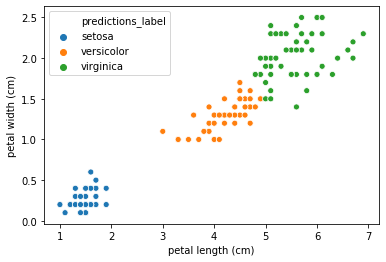

In [42]:
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', hue = 'predictions_label', data = df_previsoes)

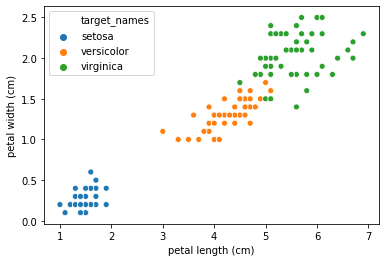

In [43]:
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', hue = 'target_names', data = df_previsoes)

# Melhorando a performance

In [43]:
#O parêmetro C dimiui o overfitting 
count = 0
for parametro in (1, 1.5, 2, 2.5, 3, 4, 10, 60):
    count += 1
    print()
    print(f"{count}")
    modelo3 = LogisticRegression(max_iter = 200, C = parametro)
    precisoes = cross_val_score(modelo3, X, y, cv = 5, scoring = 'accuracy')
    print(f"Precisão: {np.mean(precisoes) * 100:.2f}%")


1
Precisão: 97.33%

2
Precisão: 97.33%

3
Precisão: 97.33%

4
Precisão: 97.33%

5
Precisão: 97.33%

6
Precisão: 97.33%

7
Precisão: 97.33%

8
Precisão: 98.00%


> Melhor valor para o C é 60.

# Modelo final

In [66]:
#Dividindo o dataframe em treino e test
df_train, df_test = train_test_split(df, test_size = 0.20)
df_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
135,7.7,3.0,6.1,2.3,2,virginica
86,6.7,3.1,4.7,1.5,1,versicolor
79,5.7,2.6,3.5,1.0,1,versicolor
116,6.5,3.0,5.5,1.8,2,virginica
118,7.7,2.6,6.9,2.3,2,virginica


In [67]:
X_test2 = df_test.iloc[:, 0:4].values
y_test2 = df_test['target'].values
X_test2.shape

(30, 4)

In [68]:
modelo3.fit(X_train, y_train)

C:\Users\PICHAU\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=60, max_iter=200)

In [69]:
previsao3 = modelo3.predict(X_test2)
previsao3

array([2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 1, 0, 0, 2, 2])

In [70]:
print(f"Acurácia: {np.mean(y_test2 == previsao3) * 100:.2f}%")

Acurácia: 96.67%


In [71]:
y_test2 == previsao3


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [72]:
df_previsoes_test = df_test.copy()
df_previsoes_test['correct_predictions'] = y_test2 == previsao3
df_previsoes_test['prediction'] = previsao3
df_previsoes_test['predictions_label'] = df_previsoes_test['prediction'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [73]:
df_previsoes_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,correct_predictions,prediction,predictions_label
135,7.7,3.0,6.1,2.3,2,virginica,True,2,virginica
86,6.7,3.1,4.7,1.5,1,versicolor,True,1,versicolor
79,5.7,2.6,3.5,1.0,1,versicolor,True,1,versicolor
116,6.5,3.0,5.5,1.8,2,virginica,True,2,virginica
118,7.7,2.6,6.9,2.3,2,virginica,True,2,virginica


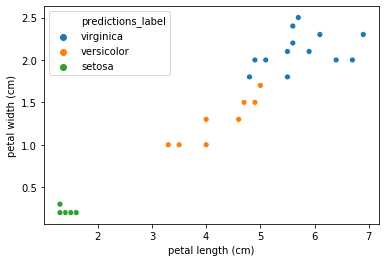

In [74]:
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', hue = 'predictions_label', data = df_previsoes_test)


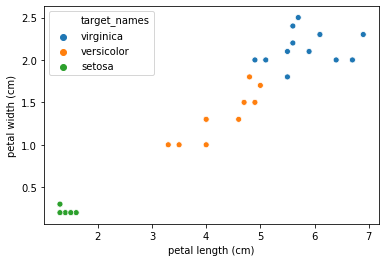

In [75]:
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', hue = 'target_names', data = df_previsoes_test)

> Comparando os acertos e erros com os gráficos

# Conclusão
O modelo consegue prever o tipo de flor com 96% de acurácia.